## Training the chatbot to understand user intents

### The first intent is: Water not hot enough

Training phrases are: 
1. water not hot enough
2. water warm
3. Water not hot


In [1]:
# Now we need to describe those training examples mathematically. We apply some really basic NLP called TFIDF.

#1. We recognize the basic building block for those phrases are "tokens"


training <- c("water not hot enough", "water warm", "Water not hot")




#### normalize the tokens by lower casing 
#####  there are many other normalization such as 
1. Stemming
2. Synonyms
3. etc.

In [2]:
training_norm_intent1 = tolower(training)
training_norm_intent1

[1] "water not hot enough" "water warm"           "water not hot"

#### Tokenization

In [3]:
tokenization = function(training_set){
    result <- list("Charactristic", length(training_set))
    for(i in 1:length(training_set)) {
    result[i] = strsplit(training_set[i], " ")
    }
    return(result)
}

In [4]:
tokenization(training_norm_intent1)

[[1]]
[1] "water"  "not"    "hot"    "enough"

[[2]]
[1] "water" "warm" 

[[3]]
[1] "water" "not"   "hot"

Store the result in a variable for future use

In [5]:
intent1 = tokenization(training_norm_intent1)

#### Form token vector

In [6]:
unlist(intent1)

[1] "water"  "not"    "hot"    "enough" "water"  "warm"   "water"  "not"   
[9] "hot"

#### Find unique tokens

In [7]:
unique_tokens <- unique(unlist(intent1))
unique_tokens

[1] "water"  "not"    "hot"    "enough" "warm"

####  TF is term frequency : counting tokens

In [8]:
sum(unlist(intent1) == "water")

[1] 3

#### Count token for each training phrases

In [9]:
unlist(intent1[1])

[1] "water"  "not"    "hot"    "enough"

In [66]:
water_TF = data.frame(matrix(nrow = length(intent1), ncol = length(unique_tokens), data = NA))
for(i in 1:length(intent1)) {
    for(j in 1:length(unique_tokens)){
        water_TF[i,j] = sum(unique_tokens[j] == unlist(intent1[i])) 
    }
}
colnames(water_TF) = unique_tokens

In [67]:
water_TF

water not hot enough warm
1 1     1   1   1      0   
2 1     0   0   0      1   
3 1     1   1   0      0

### The second intent is: WATERHEATER_SELL

**Training Phrases are:**

1. How much is the lowest priced water heater
2. How much is the water heater

In [52]:
sell_training <- c("How much is the lowest priced water heater", "How much is the water heater")
sell_training

[1] "How much is the lowest priced water heater"
[2] "How much is the water heater"

In [55]:
get_TF = function(training_set){
    training_set = tolower(training_set)
    result <- list("Charactristic", length(training_set))
    for(i in 1:length(training_set)) {
    result[i] = strsplit(training_set[i], " ")
    }
    unique_tokens = unique(unlist(result))
    TF = data.frame(matrix(nrow = length(result), ncol = length(unique_tokens), data = NA))
    for(i in 1:length(result)) {
        for(j in 1:length(unique_tokens)){
            TF[i,j] = sum(unique_tokens[j] == unlist(result[i])) 
            }
    }
    colnames(TF) = unique_tokens
    return(TF)
}

In [63]:
sell_TF = get_TF(sell_training)
sell_TF

how much is the lowest priced water heater
1 1   1    1  1   1      1      1     1     
2 1   1    1  1   0      0      1     1

### The third intent is: WATERHEATER_CHECK

**Training Phrases are:**

1. why is my water heater not functioning
2. can you help me check my water heater

In [57]:
check_training = c('why is my water heater not functioning', 'can you help me check my water heater')

In [62]:
check_TF = get_TF(check_training)
check_TF

why is my water heater not functioning can you help me check
1 1   1  1  1     1      1   1           0   0   0    0  0    
2 0   0  1  1     1      0   0           1   1   1    1  1

### The fourth intent is: WATERHEATER_INSTALL

**Training Phrases are:**

1. how much does it cost to install my water heater
2. Can you help me to install my water heater

In [59]:
install_training = c('how much does it cost to install my water heater', 'Can you help me to install my water heater')

In [61]:
install_TF = get_TF(install_training)
install_TF

how much does it cost to install my water heater can you help me
1 1   1    1    1  1    1  1       1  1     1      0   0   0    0 
2 0   0    0    0  0    1  1       1  1     1      1   1   1    1

### We concatenate all the tables

In [154]:
library('dplyr')
library('factoextra')

TF_1 = bind_rows(water_TF, sell_TF)
TF_2 = bind_rows(TF_1, check_TF)
TF_3 = bind_rows(TF_2, install_TF)
TF_3[is.na(TF_3)] = 0
TF_3

water not hot enough warm how much is the lowest ⋯ can you help me check does
1 1     1   1   1      0    0   0    0  0   0      ⋯ 0   0   0    0  0     0   
2 1     0   0   0      1    0   0    0  0   0      ⋯ 0   0   0    0  0     0   
3 1     1   1   0      0    0   0    0  0   0      ⋯ 0   0   0    0  0     0   
4 1     0   0   0      0    1   1    1  1   1      ⋯ 0   0   0    0  0     0   
5 1     0   0   0      0    1   1    1  1   0      ⋯ 0   0   0    0  0     0   
6 1     1   0   0      0    0   0    1  0   0      ⋯ 0   0   0    0  0     0   
7 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1   1    1  1     0   
8 1     0   0   0      0    1   1    0  0   0      ⋯ 0   0   0    0  0     1   
9 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1   1    1  0     0   
  it cost to install
1 0  0    0  0      
2 0  0    0  0      
3 0  0    0  0      
4 0  0    0  0      
5 0  0    0  0      
6 0  0    0  0      
7 0  0    0  0      
8 1  1    1  1      
9 0  0    1  1

In [304]:
TF_3$label = c(rep('Intent_1',3),rep('Intent_2',2),rep('Intent_3',2),rep('Intent_4',2))
TF_3

water not hot enough warm how much is the lowest ⋯ you help me check does it
1 1     1   1   1      0    0   0    0  0   0      ⋯ 0   0    0  0     0    0 
2 1     0   0   0      1    0   0    0  0   0      ⋯ 0   0    0  0     0    0 
3 1     1   1   0      0    0   0    0  0   0      ⋯ 0   0    0  0     0    0 
4 1     0   0   0      0    1   1    1  1   1      ⋯ 0   0    0  0     0    0 
5 1     0   0   0      0    1   1    1  1   0      ⋯ 0   0    0  0     0    0 
6 1     1   0   0      0    0   0    1  0   0      ⋯ 0   0    0  0     0    0 
7 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1    1  1     0    0 
8 1     0   0   0      0    1   1    0  0   0      ⋯ 0   0    0  0     1    1 
9 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1    1  0     0    0 
  cost to install label   
1 0    0  0       Intent_1
2 0    0  0       Intent_1
3 0    0  0       Intent_1
4 0    0  0       Intent_2
5 0    0  0       Intent_2
6 0    0  0       Intent_3
7 0    0  0       Intent_3
8 1    1  1       Intent_4
9 0    1  1       Intent_4

In [305]:
##group sum_TF by the labels and shows 1 if the word exsists in the specific intent. row 1 is first intent, row 2 
## is the second and so on.
sum_TF = (aggregate(TF_3[,-ncol(TF_3)], by=list(TF_3$label), sum)[,-1]>0)*1
sum_TF

water not hot enough warm how much is the lowest ⋯ can you help me check
[1,] 1     1   1   1      1    0   0    0  0   0      ⋯ 0   0   0    0  0    
[2,] 1     0   0   0      0    1   1    1  1   1      ⋯ 0   0   0    0  0    
[3,] 1     1   0   0      0    0   0    1  0   0      ⋯ 1   1   1    1  1    
[4,] 1     0   0   0      0    1   1    0  0   0      ⋯ 1   1   1    1  0    
     does it cost to install
[1,] 0    0  0    0  0      
[2,] 0    0  0    0  0      
[3,] 0    0  0    0  0      
[4,] 1    1  1    1  1

#### Calculate the IDF

In [306]:
IDF = colMeans(sum_TF)
IDF

water         not         hot      enough        warm         how 
       1.00        0.50        0.25        0.25        0.25        0.50 
       much          is         the      lowest      priced      heater 
       0.50        0.50        0.25        0.25        0.25        0.75 
        why          my functioning         can         you        help 
       0.25        0.50        0.25        0.50        0.50        0.50 
         me       check        does          it        cost          to 
       0.50        0.25        0.25        0.25        0.25        0.25 
    install 
       0.25

#### Multiply each IDF to the corresponding word to calculate TF-IDF (Smaller means more important)

In [307]:
TFIDF = mapply("*", as.data.frame(sum_TF), IDF)
TFIDF

water not hot  enough warm how much is  the  lowest ⋯ can you help me 
[1,] 1     0.5 0.25 0.25   0.25 0.0 0.0  0.0 0.00 0.00   ⋯ 0.0 0.0 0.0  0.0
[2,] 1     0.0 0.00 0.00   0.00 0.5 0.5  0.5 0.25 0.25   ⋯ 0.0 0.0 0.0  0.0
[3,] 1     0.5 0.00 0.00   0.00 0.0 0.0  0.5 0.00 0.00   ⋯ 0.5 0.5 0.5  0.5
[4,] 1     0.0 0.00 0.00   0.00 0.5 0.5  0.0 0.00 0.00   ⋯ 0.5 0.5 0.5  0.5
     check does it   cost to   install
[1,] 0.00  0.00 0.00 0.00 0.00 0.00   
[2,] 0.00  0.00 0.00 0.00 0.00 0.00   
[3,] 0.25  0.00 0.00 0.00 0.00 0.00   
[4,] 0.00  0.25 0.25 0.25 0.25 0.25

#### Do some magic called PCA (Principal Component analysis)

In [308]:
#use prcomp to calculate the x
pca_tfidf = prcomp(t(TFIDF), center = T,scale = T)

In [309]:
summary(pca_tfidf)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.5429 0.8665 0.7549 0.54666
Proportion of Variance 0.5951 0.1877 0.1425 0.07471
Cumulative Proportion  0.5951 0.7828 0.9253 1.00000

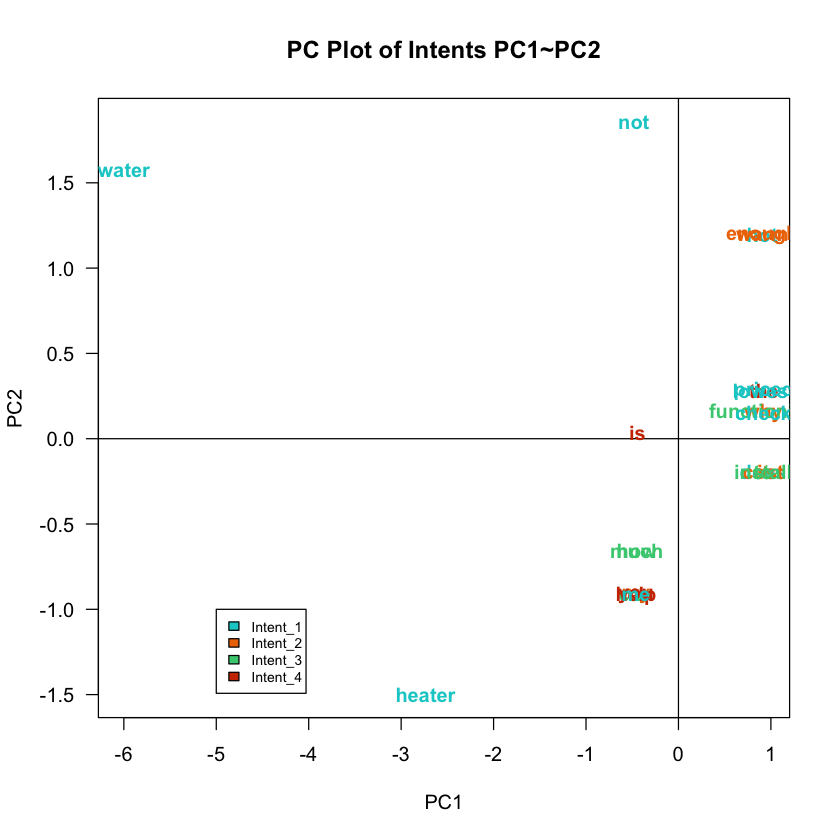

In [310]:
# Set the fonts and colors
font = rep(c(2,2,2,2),c(3,2,2,2))
color = rep(c('cyan3','darkorange2', 'seagreen3','orangered3'),c(3,2,2,2))

#Plot
plot(pca_tfidf$x[,1:2], type = "n", las = 1,main = "PC Plot of Intents PC1~PC2", xlab = 'PC1', ylab = 'PC2')
abline(h = 0, v = 0)
text(pca_tfidf$x[,1],pca_tfidf$x[,2], labels = colnames(TFIDF), col=color, font = font )
legend(-5, -1, legend=c("Intent_1", "Intent_2","Intent_3","Intent_4"),col=c('cyan3','darkorange2', 'seagreen4','orangered3'), fill=c('cyan3','darkorange2', 'seagreen3','orangered3'),cex = 0.7)